In [2]:
import pandas as pd
import numpy as np
import re, reprlib, sys
import matplotlib.pyplot as plt

%load_ext cython
%load_ext cythonmagic
%matplotlib inline

from pandas_confusion import ConfusionMatrix

import nltk as n
import nltk, nltk.classify.util, nltk.metrics, nltk.tokenize, nltk.stem
from nltk.corpus import stopwords, wordnet, treebank, brown
from nltk.stem import WordNetLemmatizer
from nltk.classify import MaxentClassifier
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures as BAM
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.tag.sequential import ClassifierBasedPOSTagger
from nltk.tag import *

from nltk.tag.util import *

from itertools import chain

import sklearn as sk
from sklearn import cross_validation
from sklearn.feature_extraction.text import *
from sklearn.svm import *
from sklearn.pipeline import *
from sklearn.multiclass import *
from sklearn.naive_bayes import *
from sklearn.feature_selection import SelectKBest, chi2

# n.download()

The cython extension is already loaded. To reload it, use:
  %reload_ext cython
The cythonmagic extension is already loaded. To reload it, use:
  %reload_ext cythonmagic


### Read data and show them

In [3]:
data = pd.read_csv("data.csv", parse_dates=True, infer_datetime_format=True, 
            sep = None, encoding = "latin-1", engine = "python")
data.head(n=2)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180,14861.6,93.29,0.03,15661,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180,14861.6,93.29,0.03,15661,0.49,0.1


In [4]:
d = {'n': "no", 'y': "yes"}

# http://stackoverflow.com/a/17702781
data = data.replace(d)

neu = data[["#AUTHID","STATUS","cNEU"]]
ext = data[["#AUTHID","STATUS","cEXT"]]
agr = data[["#AUTHID","STATUS","cAGR"]]
con = data[["#AUTHID","STATUS","cCON"]]
opn = data[["#AUTHID","STATUS","cOPN"]]

In [5]:
# data.describe()

In [6]:
# plit data
train_neu, test_neu = sk.cross_validation.train_test_split(neu, train_size = 0.66)
train_ext, test_ext = sk.cross_validation.train_test_split(ext, train_size = 0.66)
train_agr, test_agr = sk.cross_validation.train_test_split(agr, train_size = 0.66)
train_con, test_con = sk.cross_validation.train_test_split(con, train_size = 0.66)
train_opn, test_opn = sk.cross_validation.train_test_split(opn, train_size = 0.66)
print(len(train_neu))

# http://billchambers.me/tutorials/2015/01/14/python-nlp-cheatsheet-nltk-scikit-learn.html
# http://glowingpython.blogspot.de/2013/07/combining-scikit-learn-and-ntlk.html
# http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
# https://stackoverflow.com/questions/10526579/use-scikit-learn-to-classify-into-multiple-categories
# https://github.com/anuraagvak/IRE-PersonalityRecognition-Final/blob/master/ire_report.pdf
# https://github.com/Charudatt89/Personality_Recognition/blob/master/22-9-PersonalityRecognition/Report/Report.pdf
# http://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python

6545


In [53]:
target_names = ['yes', 'no']

classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    #('nb', MultinomialNB())])
    ('clf', OneVsRestClassifier(MultinomialNB()))])


clas_fit = classifier.fit(train_neu["STATUS"], train_neu["cNEU"])
predicted = classifier.predict(test_neu["cNEU"])

#scores = cross_validation.cross_val_score(classifier, neu["STATUS"], neu["cNEU"], cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


count = 0
for item, labels in zip(test_neu["STATUS"], predicted):
    count += 1
#print(count)

confusion_matrix = ConfusionMatrix(test_neu["cNEU"], predicted)
confusion_matrix.print_stats()

Accuracy: 0.56 (+/- 0.01)
Confusion Matrix:

Predicted   no  yes  __all__
Actual                      
no         360  230      590
yes        317  202      519
__all__    677  432     1109


Overall Statistics:

Accuracy: 0.506762849414
95% CI: (0.47690253676825528, 0.53658719736965199)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.999999999999
Kappa: -0.000626811361121
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         no          yes
Population                                    1109         1109
P: Condition positive                          590          519
N: Condition negative                          519          590
Test outcome positive                          677          432
Test outcome negative                          432          677
TP: True Positive                              360          202
TN: True Negative                              202          360
FP: False Positive                             317          2

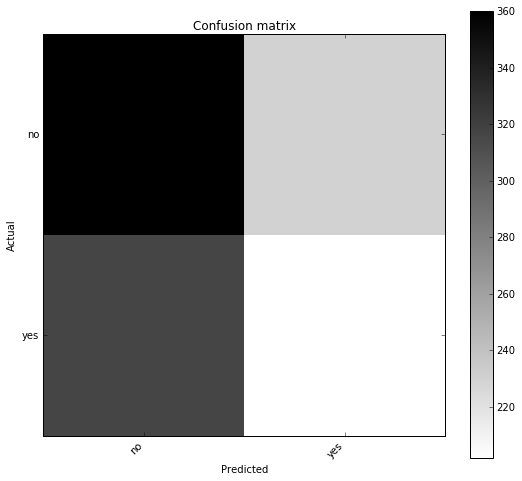

In [49]:
confusion_matrix.plot(normalized=False)

Bigram/Trigram training/test

In [9]:
tritagger = TrigramTagger(train_sents)
tritagger.

SyntaxError: invalid syntax (<ipython-input-9-d6301a3fa129>, line 2)

<strong>Rules</strong>
    * Each single sentence counts (but no weird symbols incl. punc.) and lowercase
    * We do use lemmalization, deleting words etc.
    
##### Meeting with Dustin:    
    * Split dataset according to traits, with one column status and another one the yes/no variable

In [10]:
#tagger = n.ClassifierBasedPOSTagger(train=train_neu)


In [11]:
lines_of_trained_dataset = train_neu["STATUS"] # .str.lower()

In [12]:
# http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize
twt = n.TreebankWordTokenizer()

# Create lists
list_of_rows_CD = [l.split("\n")[0] for l in lines_of_trained_dataset]

list_of_splitted_words_CD, list_of_sentences = [], []

for k in list_of_rows_CD:
    list_of_sentences.append(n.sent_tokenize(k))
    
for kCD in list_of_rows_CD:
    list_of_splitted_words_CD.append(n.word_tokenize(kCD))

In [13]:
print(list_of_splitted_words_CD[:2], "\n\n", list_of_rows_CD[:2], "\n\n", list_of_sentences[:2])

[['People', 'demand', 'freedom', 'of', 'speech', 'to', 'make', 'up', 'for', 'the', 'freedom', 'of', 'thought', 'which', 'they', 'avoid'], ['is', 'excited', 'for', 'being', 'able', 'to', 'spot', 'the', 'Summer', 'Triangle', '.', 'Not', 'to', 'be', 'confused', 'with', 'the', 'Bermuda', 'Triangle', '.']] 

 ['People demand freedom of speech to make up  for the freedom of thought which they avoid', 'is excited for being able to spot the Summer Triangle. Not to be confused with the Bermuda Triangle.'] 

 [['People demand freedom of speech to make up  for the freedom of thought which they avoid'], ['is excited for being able to spot the Summer Triangle.', 'Not to be confused with the Bermuda Triangle.']]


In [14]:
# https://stackoverflow.com/questions/2058985/python-count-sub-lists-in-nested-list
print("there are", sum(len(x) for x in list_of_splitted_words_CD), "tokens in", len(list_of_sentences), "sentences")

there are 116979 tokens in 6545 sentences


In [15]:
#print(list_of_rows_CD[:2], "\n")
#print(list_of_sentences[:2],"\n") 
#print(list_of_splitted_words_CD[:2], "\n")

### Different tokenizers (will decide later on which one)

Source: http://text-processing.com/demo/tokenize/


<!-- <img src="dif_tokenizers.png"> -->

### SnowballStemmer 

##### https://stackoverflow.com/questions/10554052/what-are-the-major-differences-and-benefits-of-porter-and-lancaster-stemming-alg

> Stemming is a technique to remove affixes from a word, ending up with the stem. For
example, the stem of cooking is cook, and a good stemming algorithm knows that the ing
suffix can be removed.


### Lemmatization 
is very similar to stemming, but is more akin to synonym replacement. A lemma is a root word, as opposed to the root stem. So unlike stemming, you are always left with a valid word that means the same thing. However, the word you end up with can be completely different.

In [16]:
# Huge nested lists
# http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.wordnet

nest_list_lm = [[] for _ in range(len(list_of_splitted_words_CD))]

lm = n.stem.WordNetLemmatizer()

for sentence in list_of_splitted_words_CD: 
    for word in sentence:
        nest_list_lm[list_of_splitted_words_CD.index(sentence)].append(lm.lemmatize(word))

print("Original \n", reprlib.repr(list_of_sentences), "\n")
print("Lemmatizer \n", reprlib.repr(nest_list_lm), "\n")

Original 
 [['People deman...ch they avoid'], ['is excited f...mer Triangle.', 'Not to be co...uda Triangle.'], ['wonders how ...figure it out'], ['Just ate a n...ne reduction.', 'Wish my feet...eally cook !!', 'Tomorrow we ...illet and me.'], ['learns more ...s everything.'], ['"*PROPNAME*"...middle names.', 'Everyone calm down now...'], ...] 

Lemmatizer 
 [['People', 'demand', 'freedom', 'of', 'speech', 'to', ...], ['is', 'excited', 'for', 'being', 'able', 'to', ...], ['wonder', 'how', 'I', 'keep', 'getting', 'convinced', ...], ['Just', 'ate', 'a', 'nice', 'happy', 'cow', ...], ['learns', 'more', 'and', 'more', 'every', 'day', ...], ['``', '*PROPNAME*', "''", 'and', '``', '*PROPNAME*', ...], ...] 



### Removing repeating characters

In [17]:
# book 38
class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
        
    def replace(self, word):        
        if wordnet.synsets(word):
            return word
    
        repl_word = self.repeat_regexp.sub(self.repl, word)

        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word
        
    def delete_stupid_chars(self, word):
        """
        http://stackoverflow.com/a/3874768
        used above
        replaced_word = self.replace(word)
        """
        rem = "!?#.,();:'[].,//``...~<>$%^&*-_-=+"
        return word.translate(str.maketrans(dict.fromkeys(rem)))

replacer = RepeatReplacer()
replacer.delete_stupid_chars("!?sdf,word!??)()")

'sdfword'

In [18]:
def delete_repChars():
    nest_list_lm_repchars = [[] for _ in range(len(nest_list_lm))]
    for sentence in nest_list_lm:
        for word in sentence:
            nest_list_lm_repchars[nest_list_lm.index(sentence)].append(replacer.delete_stupid_chars(word))
    return nest_list_lm_repchars

def delete_empty_strings():
    nest = [[] for _ in range(len(nest_list_lm_repchars))]
    for sentence in nest_list_lm_repchars: 
        for word in sentence:
            if word != '':
                nest[nest_list_lm_repchars.index(sentence)].append(word)
    return nest

nest_list_lm_repchars = delete_repChars()
nest = delete_empty_strings()

In [19]:
word_tokens = n.word_tokenize(list_of_splitted_words_CD)
print(word_tokens)

unitagger = n.UnigramTagger()
#bitagger = n.BigramTagger(train_neu["STATUS"])

TypeError: expected string or buffer

In [20]:
outlst = [' '.join([str(c) for c in hm]) for hm in nest]

print(reprlib.repr(nest_list_lm_repchars), "\n\n", reprlib.repr(outlst), "\n\n", reprlib.repr(nest))

[['People', 'demand', 'freedom', 'of', 'speech', 'to', ...], ['is', 'excited', 'for', 'being', 'able', 'to', ...], ['wonder', 'how', 'I', 'keep', 'getting', 'convinced', ...], ['Just', 'ate', 'a', 'nice', 'happy', 'cow', ...], ['learns', 'more', 'and', 'more', 'every', 'day', ...], ['', 'PROPNAME', '', 'and', '', 'PROPNAME', ...], ...] 

 ['People deman...ch they avoid', 'is excited f...muda Triangle', 'wonder how I...figure it out', 'Just ate a n...killet and me', 'learns more ...is everything', 'PROPNAME and...calm down now', ...] 

 [['People', 'demand', 'freedom', 'of', 'speech', 'to', ...], ['is', 'excited', 'for', 'being', 'able', 'to', ...], ['wonder', 'how', 'I', 'keep', 'getting', 'convinced', ...], ['Just', 'ate', 'a', 'nice', 'happy', 'cow', ...], ['learns', 'more', 'and', 'more', 'every', 'day', ...], ['PROPNAME', 'and', 'PROPNAME', 'are', 'my', 'two', ...], ...]


In [21]:
#http://aylien.com/web-summit-2015-tweets-part1
vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(outlst)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

print("devil: " + str(tfidf["devil"]))

devil: 7.58938487772


In [22]:
# backoff = DefaultTagger('NN')
# tagger = BackoffTagger([UnigramTagger, BigramTagger,TrigramTagger])
# print(brown.sents(categories='news')[0])
# print(brown.tagged_sents(categories='news')[0])

# tagger1 = DefaultTagger('NN')
# t1 = tagger1.tag_sents(nest)
# print(t1[0])

# bitagger = BigramTagger(t1)
# tritagger = TrigramTagger(train_sents)

train_sents =  treebank.tagged_sents()[3000:]
test_sents =  treebank.tagged_sents()[:3000]

#print(test_sents[0])
tagger = n.ClassifierBasedPOSTagger(train=train_sents)
tagger.evaluate(test_sents)

0.8860677839274426

### Create tagged words from all sentences

In [23]:
#print(reprlib.repr(nest_list_without_stopwords_lm))

print(list_of_rows_CD[0])
print(list_of_splitted_words_CD[0])
print(list_of_sentences[0], "\n")

#tag_words = n.pos_tag(list_of_splitted_words_CD)
#print(tag_words, "\n")
# print(reprlib.repr(tagged_words()))


People demand freedom of speech to make up  for the freedom of thought which they avoid
['People', 'demand', 'freedom', 'of', 'speech', 'to', 'make', 'up', 'for', 'the', 'freedom', 'of', 'thought', 'which', 'they', 'avoid']
['People demand freedom of speech to make up  for the freedom of thought which they avoid'] 



In [24]:
nest_list_tagged_words = [[] for _ in range(len(nest_list_without_stopwords_lm_repchars))]

#def tagged_words():
#    for sentence in nest_list_without_stopwords_lm_repchars:
#        for words in sentence:
#            nest_list_tagged_words[nest_list_without_stopwords_lm_repchars.index(sentence)].append(n.pos_tag(words))
#    return nest_list_tagged_words


NameError: name 'nest_list_without_stopwords_lm_repchars' is not defined

### Unigram features

Use -a for code analysis

In [25]:
def word_fea(words):
    return dict((word, True))
word_fea(outlst)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [26]:
# Bigram collocation
# https://github.com/neotenic/cancer/blob/master/nltk.ipynb
def bigram_features(words, score_fn=BAM.chi_sq): 
    bg_finder = BigramCollocationFinder.from_words(words) 
    bigrams = bg_finder.nbest(score_fn, 100000) 
    return dict((bg, True) for bg in chain(words, bigrams)) 

#bigram_features(outlst, score_fn=BAM.chi_sq)

In [27]:
cl = n.NaiveBayesClassifier.train(train)
print(n.classify.accuracy(cl, test),"%.3f")
cl.show_most_informative_features(40)
cl.prob_classify(featurize(name)) #

NameError: name 'train' is not defined